In [1]:
import os

# Change this if your zip is in a different folder
base_path = "/content/drive/MyDrive"

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".zip"):
            print(os.path.join(root, file))


/content/drive/MyDrive/archive (1).zip


In [2]:
import os

extract_path = "/content/drive/MyDrive/INbreast_extracted"
os.makedirs(extract_path, exist_ok=True)

print("Extraction folder ready:", extract_path)


Extraction folder ready: /content/drive/MyDrive/INbreast_extracted


In [3]:
import zipfile

zip_path = "/content/drive/MyDrive/archive (1).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped successfully")


✅ Dataset unzipped successfully


In [4]:
for root, dirs, files in os.walk(extract_path):
    print("📁", root)
    if len(files) > 0:
        print("   Files:", files[:5])
    break


📁 /content/drive/MyDrive/INbreast_extracted


In [5]:
import os

base_dir = "/content/drive/MyDrive/INbreast_extracted"

for root, dirs, files in os.walk(base_dir):
    print("\n📁 Folder:", root)
    if dirs:
        print("   Subfolders:", dirs)
    if files:
        print("   Files:", files[:10])  # show only first 10 files



📁 Folder: /content/drive/MyDrive/INbreast_extracted
   Subfolders: ['INbreast Release 1.0']

📁 Folder: /content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0
   Subfolders: ['AllDICOMs', 'AllROI', 'AllXML', 'MedicalReports', 'PectoralMuscle']
   Files: ['INbreast.csv', 'INbreast.xls', 'README.txt', 'inbreast.pdf']

📁 Folder: /content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllDICOMs
   Files: ['20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm', '20586934_6c613a14b80a8591_MG_L_CC_ANON.dcm', '20586960_6c613a14b80a8591_MG_R_ML_ANON.dcm', '20586986_6c613a14b80a8591_MG_L_ML_ANON.dcm', '20587054_b6a4f750c6df4f90_MG_R_CC_ANON.dcm', '20587080_b6a4f750c6df4f90_MG_R_ML_ANON.dcm', '20587148_fd746d25eb40b3dc_MG_R_CC_ANON.dcm', '20587174_fd746d25eb40b3dc_MG_L_CC_ANON.dcm', '20587200_fd746d25eb40b3dc_MG_R_ML_ANON.dcm', '20587226_fd746d25eb40b3dc_MG_L_ML_ANON.dcm']

📁 Folder: /content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllROI
   Files: ['20586908.roi', '20586934.ro

In [6]:
!pip install pydicom opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.9 MB/s eta 0:00:00


DICOM shape: (4084, 3328)
Pixel value range: 0 2970


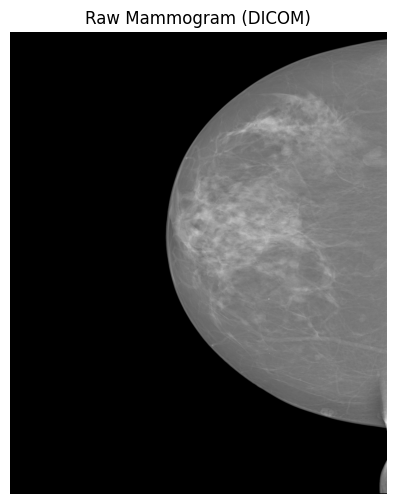

In [7]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Pick one sample DICOM
dicom_path = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllDICOMs/20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"

# Load DICOM
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

print("DICOM shape:", image.shape)
print("Pixel value range:", image.min(), image.max())

# Display
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.title("Raw Mammogram (DICOM)")
plt.axis("off")
plt.show()


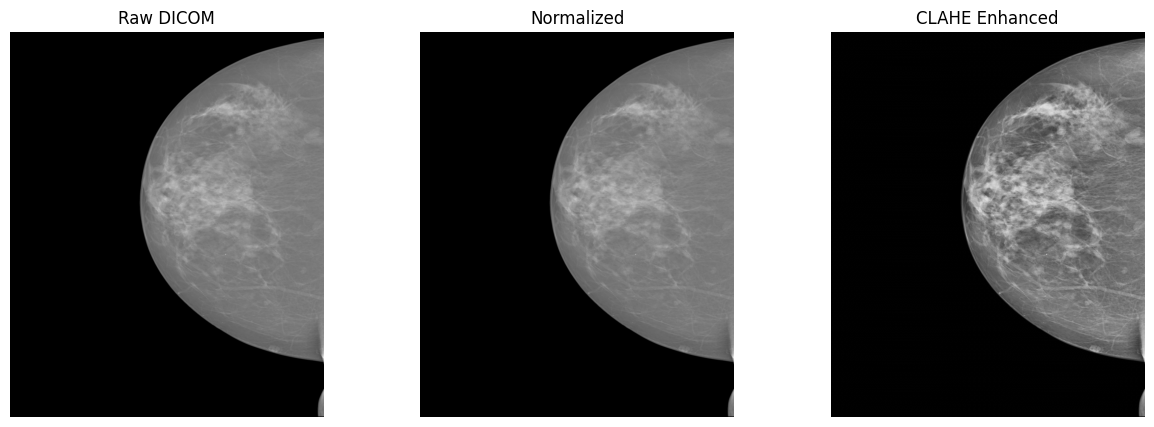

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_mammogram(img):
    """
    Research-standard mammogram preprocessing
    """
    # Convert to float
    img = img.astype(np.float32)

    # Normalize to [0, 1]
    img = (img - img.min()) / (img.max() - img.min() + 1e-6)

    # Convert to 8-bit
    img_8bit = (img * 255).astype(np.uint8)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(img_8bit)

    return img_8bit, img_clahe


# Apply preprocessing
raw_img = image
norm_img, clahe_img = preprocess_mammogram(raw_img)

# Visualize comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(raw_img, cmap="gray")
plt.title("Raw DICOM")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(norm_img, cmap="gray")
plt.title("Normalized")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(clahe_img, cmap="gray")
plt.title("CLAHE Enhanced")
plt.axis("off")

plt.show()


In [9]:
import xml.etree.ElementTree as ET

# Pick one XML file (same ID as the DICOM)
xml_path = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllXML/20586908.xml"

tree = ET.parse(xml_path)
root = tree.getroot()

# Print XML structure (top level)
for child in root:
    print(child.tag)


dict


In [10]:
import xml.etree.ElementTree as ET

xml_path = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllXML/20586908.xml"

tree = ET.parse(xml_path)
root = tree.getroot()

def print_xml(element, indent=0):
    print("  " * indent + element.tag)
    for child in element:
        print_xml(child, indent + 1)

print_xml(root)


plist
  dict
    key
    array
      dict
        key
        integer
        key
        integer
        key
        array
          dict
            key
            real
            key
            string
            key
            real
            key
            integer
            key
            real
            key
            real
            key
            real
            key
            string
            key
            integer
            key
            array
              string
            key
            array
              string
            key
            real
            key
            integer
          dict
            key
            real
            key
            string
            key
            real
            key
            integer
            key
            real
            key
            real
            key
            real
            key
            string
            key
            integer
            key
            array
              strin

In [11]:
import plistlib

xml_path = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllXML/20586908.xml"

with open(xml_path, 'rb') as f:
    data = plistlib.load(f)

# Inspect top-level keys
print("Top-level keys:\n")
for key in data.keys():
    print("-", key)


Top-level keys:

- Images


In [12]:
# Inspect the first image dictionary
images = data["Images"]

print("Number of image entries:", len(images))
print("\nKeys inside one image entry:\n")

for key in images[0].keys():
    print("-", key)


Number of image entries: 1

Keys inside one image entry:

- ImageIndex
- NumberOfROIs
- ROIs


In [13]:
rois = images[0]["ROIs"]

print("Number of ROIs (lesions) in this image:", len(rois))
print("\nKeys inside one ROI:\n")

for key in rois[0].keys():
    print("-", key)


Number of ROIs (lesions) in this image: 42

Keys inside one ROI:

- Area
- Center
- Dev
- IndexInImage
- Max
- Mean
- Min
- Name
- NumberOfPoints
- Point_mm
- Point_px
- Total
- Type


In [14]:
# Inspect first few ROIs to understand lesion types
for i in range(5):
    roi = rois[i]
    print(f"\nROI {i}")
    print("Type:", roi["Type"])
    print("Name:", roi["Name"])
    print("Number of points:", roi["NumberOfPoints"])



ROI 0
Type: 19
Name: Calcification
Number of points: 1

ROI 1
Type: 19
Name: Calcification
Number of points: 1

ROI 2
Type: 19
Name: Calcification
Number of points: 1

ROI 3
Type: 19
Name: Calcification
Number of points: 1

ROI 4
Type: 15
Name: Calcification
Number of points: 9


In [16]:
import numpy as np
import ast

def parse_point(p):
    """
    Parse a single ROI point which may be:
    - tuple
    - list
    - string "(x, y)"
    """
    if isinstance(p, str):
        try:
            p = ast.literal_eval(p)  # "(x, y)" -> (x, y)
        except:
            return None
    if isinstance(p, (list, tuple)) and len(p) == 2:
        return float(p[0]), float(p[1])
    return None


def roi_to_bbox(roi, box_size=10):
    """
    Robust INbreast ROI → bounding box
    Handles strings, malformed points, polygons
    """
    raw_pts = roi["Point_px"]
    points = []

    for p in raw_pts:
        parsed = parse_point(p)
        if parsed is not None:
            points.append(parsed)

    if len(points) == 0:
        return None

    pts = np.array(points)

    # Single-point calcification
    if pts.shape[0] == 1:
        x, y = pts[0]
        return [
            int(x - box_size),
            int(y - box_size),
            int(x + box_size),
            int(y + box_size)
        ]

    # Polygon ROI
    x_min = int(np.min(pts[:, 0]))
    y_min = int(np.min(pts[:, 1]))
    x_max = int(np.max(pts[:, 0]))
    y_max = int(np.max(pts[:, 1]))

    return [x_min, y_min, x_max, y_max]


# Test on first 10 ROIs
valid = 0
for i in range(10):
    bbox = roi_to_bbox(rois[i])
    print(f"ROI {i} bbox:", bbox)
    if bbox is not None:
        valid += 1

print("\nValid bounding boxes:", valid, "/ 10")


ROI 0 bbox: [2954, 3417, 2974, 3437]
ROI 1 bbox: [2983, 3393, 3003, 3413]
ROI 2 bbox: [2178, 3115, 2198, 3135]
ROI 3 bbox: [3177, 1982, 3197, 2002]
ROI 4 bbox: [2288, 2835, 2295, 2843]
ROI 5 bbox: [2986, 1205, 3006, 1225]
ROI 6 bbox: [2321, 2856, 2341, 2876]
ROI 7 bbox: [2800, 1210, 2820, 1230]
ROI 8 bbox: [2656, 710, 2676, 730]
ROI 9 bbox: [2536, 1687, 2556, 1707]

Valid bounding boxes: 10 / 10


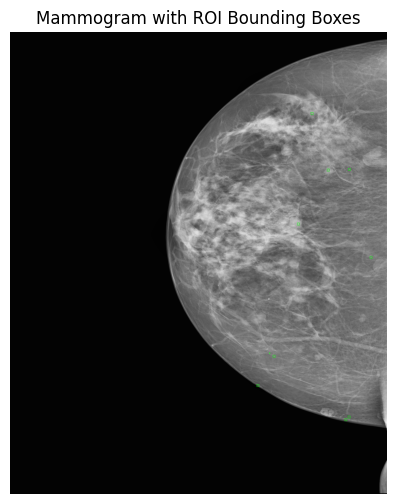

In [17]:
import matplotlib.pyplot as plt
import cv2

# Copy image so we don't overwrite original
img_vis = clahe_img.copy()
img_vis = cv2.cvtColor(img_vis, cv2.COLOR_GRAY2BGR)

# Draw first 10 bounding boxes
for i in range(10):
    bbox = roi_to_bbox(rois[i])
    if bbox is None:
        continue
    x1, y1, x2, y2 = bbox
    cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show image
plt.figure(figsize=(6, 6))
plt.imshow(img_vis)
plt.title("Mammogram with ROI Bounding Boxes")
plt.axis("off")
plt.show()


In [18]:
import os
import pandas as pd
import plistlib

dicom_dir = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllDICOMs"
xml_dir = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllXML"

records = []

for xml_file in os.listdir(xml_dir):
    if not xml_file.endswith(".xml"):
        continue

    xml_path = os.path.join(xml_dir, xml_file)
    with open(xml_path, "rb") as f:
        data = plistlib.load(f)

    image_entry = data["Images"][0]
    num_rois = image_entry["NumberOfROIs"]

    image_id = xml_file.replace(".xml", "")

    records.append({
        "image_id": image_id,
        "label": 1 if num_rois > 0 else 0
    })

df_labels = pd.DataFrame(records)

print(df_labels.head())
print("\nLabel distribution:\n", df_labels["label"].value_counts())


   image_id  label
0  20586908      1
1  20586934      1
2  20586960      1
3  20586986      1
4  20587054      1

Label distribution:
 label
1    343
Name: count, dtype: int64


In [19]:
import pydicom
import cv2
import numpy as np

def load_dicom(path):
    ds = pydicom.dcmread(path)
    return ds.pixel_array

def preprocess(img):
    img = img.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min() + 1e-6)
    img = (img * 255).astype(np.uint8)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    return img


Extracted patches: 5


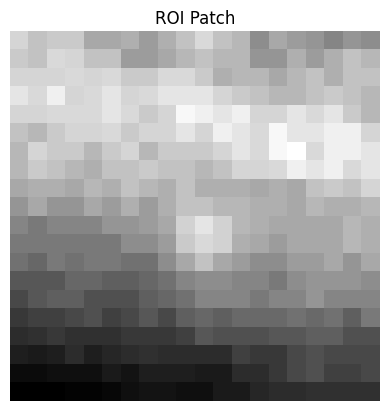

In [20]:
# Paths
dicom_path = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllDICOMs/20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
xml_path   = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllXML/20586908.xml"

# Load image
img = preprocess(load_dicom(dicom_path))

# Load ROIs
import plistlib
with open(xml_path, "rb") as f:
    data = plistlib.load(f)

rois = data["Images"][0]["ROIs"]

patches = []

for roi in rois[:5]:  # take first 5 for test
    bbox = roi_to_bbox(roi)
    if bbox is None:
        continue
    x1, y1, x2, y2 = bbox
    patch = img[y1:y2, x1:x2]
    if patch.size > 0:
        patches.append(patch)

print("Extracted patches:", len(patches))

# Visualize one patch
import matplotlib.pyplot as plt
plt.imshow(patches[0], cmap="gray")
plt.title("ROI Patch")
plt.axis("off")
plt.show()


In [21]:
from tqdm import tqdm

PATCH_SIZE = 224

all_patches = []
all_labels = []

for xml_file in tqdm(os.listdir(xml_dir)):
    if not xml_file.endswith(".xml"):
        continue

    image_id = xml_file.replace(".xml", "")
    xml_path = os.path.join(xml_dir, xml_file)

    # Find matching DICOM
    dicom_files = [f for f in os.listdir(dicom_dir) if f.startswith(image_id)]
    if len(dicom_files) == 0:
        continue

    dicom_path = os.path.join(dicom_dir, dicom_files[0])

    # Load image
    img = preprocess(load_dicom(dicom_path))

    # Load ROIs
    with open(xml_path, "rb") as f:
        data = plistlib.load(f)

    rois = data["Images"][0]["ROIs"]

    for roi in rois:
        bbox = roi_to_bbox(roi)
        if bbox is None:
            continue

        x1, y1, x2, y2 = bbox
        patch = img[y1:y2, x1:x2]

        if patch.size == 0:
            continue

        # Resize
        patch = cv2.resize(patch, (PATCH_SIZE, PATCH_SIZE))

        all_patches.append(patch)
        all_labels.append(1)

print("Total patches extracted:", len(all_patches))


100%|██████████| 343/343 [01:32<00:00,  3.69it/s]

Total patches extracted: 7311


In [22]:
!pip install torch torchvision


In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class ROIDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]

        # Convert to tensor & normalize to [0,1]
        img = torch.tensor(img, dtype=torch.float32).unsqueeze(0) / 255.0
        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return img, label


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    all_patches, all_labels,
    test_size=0.2,
    random_state=42
)

train_dataset = ROIDataset(X_train, y_train)
val_dataset   = ROIDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Train samples:", len(train_dataset))
print("Val samples:", len(val_dataset))


Train samples: 5848
Val samples: 1463


In [25]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [26]:
class EfficientNetBinary(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = models.efficientnet_b0(pretrained=True)

        # Modify first conv layer to accept 1 channel instead of 3
        self.model.features[0][0] = nn.Conv2d(
            1, 32, kernel_size=3, stride=2, padding=1, bias=False
        )

        # Modify classifier for binary output
        in_features = self.model.classifier[1].in_features
        self.model.classifier[1] = nn.Linear(in_features, 1)

    def forward(self, x):
        return self.model(x)


model = EfficientNetBinary().to(device)
print(model)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 129MB/s]


EfficientNetBinary(
  (model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (sc

In [27]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [28]:
def train_one_epoch(model, loader):
    model.train()
    total_loss = 0

    for imgs, labels in loader:
        imgs = imgs.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)


train_loss = train_one_epoch(model, train_loader)
print("Training loss (1 epoch):", train_loss)


Training loss (1 epoch): 0.09833142602602478


In [29]:
import torch.nn.functional as F

def validate(model, loader):
    model.eval()
    total_loss = 0
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            outputs = model(imgs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            probs = torch.sigmoid(outputs)  # convert logits → probability
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return total_loss / len(loader), all_probs, all_labels


In [30]:
val_loss, val_probs, val_labels = validate(model, val_loader)

print("Validation loss:", val_loss)
print("Sample probabilities:", val_probs[:5])


Validation loss: 0.006197627006179612
Sample probabilities: [array([0.9954972], dtype=float32), array([0.9936992], dtype=float32), array([0.9929259], dtype=float32), array([0.99570894], dtype=float32), array([0.9931492], dtype=float32)]


In [31]:
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    if interArea == 0:
        return 0.0

    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    return interArea / float(boxAArea + boxBArea - interArea)


Negative patches extracted: 5


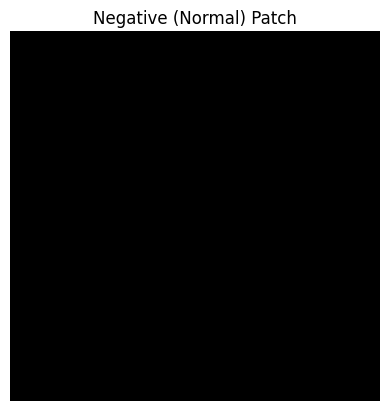

In [32]:
import random

NEG_PATCHES = []

img = preprocess(load_dicom(dicom_path))
h, w = img.shape

# Get all ROI boxes for this image
roi_boxes = []
for roi in rois:
    bbox = roi_to_bbox(roi)
    if bbox is not None:
        roi_boxes.append(bbox)

# Sample random background patches
attempts = 0
while len(NEG_PATCHES) < 5 and attempts < 100:
    x = random.randint(0, w - PATCH_SIZE)
    y = random.randint(0, h - PATCH_SIZE)
    candidate = [x, y, x + PATCH_SIZE, y + PATCH_SIZE]

    # Check overlap with any ROI
    if all(compute_iou(candidate, rb) < 0.01 for rb in roi_boxes):
        patch = img[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
        NEG_PATCHES.append(patch)

    attempts += 1

print("Negative patches extracted:", len(NEG_PATCHES))

# Visualize one negative patch
plt.imshow(NEG_PATCHES[0], cmap="gray")
plt.title("Negative (Normal) Patch")
plt.axis("off")
plt.show()


In [33]:
# Create a simple breast mask (non-background)
def get_breast_mask(img, threshold=10):
    """
    img: preprocessed (uint8) image
    Returns binary mask of breast region
    """
    mask = img > threshold  # background is near 0
    return mask.astype(np.uint8)


Negative patches extracted: 5


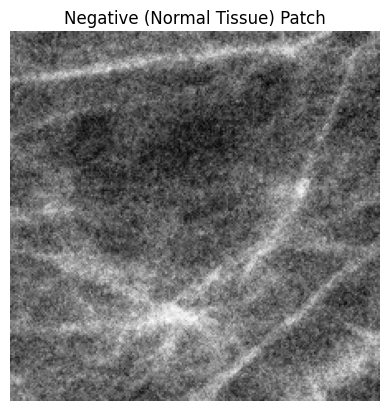

In [34]:
NEG_PATCHES = []

img = preprocess(load_dicom(dicom_path))
h, w = img.shape
breast_mask = get_breast_mask(img)

# ROI boxes
roi_boxes = []
for roi in rois:
    bbox = roi_to_bbox(roi)
    if bbox is not None:
        roi_boxes.append(bbox)

attempts = 0
while len(NEG_PATCHES) < 5 and attempts < 500:
    x = random.randint(0, w - PATCH_SIZE)
    y = random.randint(0, h - PATCH_SIZE)

    # Check if center of patch is inside breast
    cx = x + PATCH_SIZE // 2
    cy = y + PATCH_SIZE // 2

    if breast_mask[cy, cx] == 0:
        attempts += 1
        continue

    candidate = [x, y, x + PATCH_SIZE, y + PATCH_SIZE]

    # Avoid overlap with ROIs
    if all(compute_iou(candidate, rb) < 0.01 for rb in roi_boxes):
        patch = img[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
        NEG_PATCHES.append(patch)

    attempts += 1

print("Negative patches extracted:", len(NEG_PATCHES))

# Visualize one negative patch
plt.imshow(NEG_PATCHES[0], cmap="gray")
plt.title("Negative (Normal Tissue) Patch")
plt.axis("off")
plt.show()


In [35]:
NEG_RATIO = 1  # 1 negative per positive
negative_patches = []
negative_labels = []

for xml_file in tqdm(os.listdir(xml_dir)):
    if not xml_file.endswith(".xml"):
        continue

    image_id = xml_file.replace(".xml", "")
    xml_path = os.path.join(xml_dir, xml_file)

    # Match DICOM
    dicom_files = [f for f in os.listdir(dicom_dir) if f.startswith(image_id)]
    if len(dicom_files) == 0:
        continue
    dicom_path = os.path.join(dicom_dir, dicom_files[0])

    img = preprocess(load_dicom(dicom_path))
    h, w = img.shape
    breast_mask = get_breast_mask(img)

    # Load ROIs
    with open(xml_path, "rb") as f:
        data = plistlib.load(f)
    rois = data["Images"][0]["ROIs"]

    roi_boxes = []
    for roi in rois:
        bbox = roi_to_bbox(roi)
        if bbox is not None:
            roi_boxes.append(bbox)

    # Number of negatives to sample
    n_neg = min(len(roi_boxes), 5)  # cap per image

    attempts = 0
    collected = 0

    while collected < n_neg and attempts < 1000:
        x = random.randint(0, w - PATCH_SIZE)
        y = random.randint(0, h - PATCH_SIZE)

        cx = x + PATCH_SIZE // 2
        cy = y + PATCH_SIZE // 2

        if breast_mask[cy, cx] == 0:
            attempts += 1
            continue

        candidate = [x, y, x + PATCH_SIZE, y + PATCH_SIZE]

        if all(compute_iou(candidate, rb) < 0.01 for rb in roi_boxes):
            patch = img[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
            negative_patches.append(patch)
            negative_labels.append(0)
            collected += 1

        attempts += 1

print("Total negative patches:", len(negative_patches))


100%|██████████| 343/343 [01:35<00:00,  3.58it/s]

Total negative patches: 1407


In [36]:
# Combine datasets
X_all = all_patches + negative_patches
y_all = all_labels + negative_labels

print("Total samples:", len(X_all))
print("Positive samples:", sum(y_all))
print("Negative samples:", len(y_all) - sum(y_all))


Total samples: 8718
Positive samples: 7311
Negative samples: 1407


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_all, y_all,
    test_size=0.2,
    stratify=y_all,
    random_state=42
)

print("Train positives:", sum(y_train), "Train negatives:", len(y_train)-sum(y_train))
print("Val positives:", sum(y_val), "Val negatives:", len(y_val)-sum(y_val))


Train positives: 5848 Train negatives: 1126
Val positives: 1463 Val negatives: 281


In [38]:
train_dataset = ROIDataset(X_train, y_train)
val_dataset   = ROIDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [39]:
import torch

pos = sum(y_train)
neg = len(y_train) - pos

pos_weight = torch.tensor([neg / pos]).to(device)
print("Positive class weight:", pos_weight.item())

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


Positive class weight: 0.19254446029663086


In [40]:
import copy

EPOCHS = 15
best_val_loss = float("inf")
best_model_wts = copy.deepcopy(model.state_dict())

train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    # ---- Train ----
    model.train()
    running_loss = 0

    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # ---- Validate ----
    val_loss, val_probs, val_labels = validate(model, val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

# Load best model
model.load_state_dict(best_model_wts)

print("\n✅ Training complete")
print("Best validation loss:", best_val_loss)


Epoch [1/15] Train Loss: 0.0425 | Val Loss: 0.0167
Epoch [2/15] Train Loss: 0.0085 | Val Loss: 0.0066
Epoch [3/15] Train Loss: 0.0067 | Val Loss: 0.0043
Epoch [4/15] Train Loss: 0.0045 | Val Loss: 0.0035
Epoch [5/15] Train Loss: 0.0053 | Val Loss: 0.0037
Epoch [6/15] Train Loss: 0.0030 | Val Loss: 0.0075
Epoch [7/15] Train Loss: 0.0023 | Val Loss: 0.0036
Epoch [8/15] Train Loss: 0.0037 | Val Loss: 0.0058
Epoch [9/15] Train Loss: 0.0030 | Val Loss: 0.0037
Epoch [10/15] Train Loss: 0.0018 | Val Loss: 0.0048
Epoch [11/15] Train Loss: 0.0022 | Val Loss: 0.0042
Epoch [12/15] Train Loss: 0.0023 | Val Loss: 0.0049
Epoch [13/15] Train Loss: 0.0020 | Val Loss: 0.0023
Epoch [14/15] Train Loss: 0.0009 | Val Loss: 0.0015
Epoch [15/15] Train Loss: 0.0014 | Val Loss: 0.0037

✅ Training complete
Best validation loss: 0.0015438775527317457


In [41]:
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

model.eval()
all_probs = []
all_true = []

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

        all_probs.extend(probs)
        all_true.extend(labels.numpy())

all_probs = np.array(all_probs)
all_true = np.array(all_true)

print("Collected predictions:", len(all_probs))


Collected predictions: 1744


In [42]:
auc = roc_auc_score(all_true, all_probs)
print("Validation ROC-AUC:", auc)


Validation ROC-AUC: 0.9999829726370277


In [43]:
preds = (all_probs >= 0.5).astype(int)

cm = confusion_matrix(all_true, preds)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(all_true, preds, target_names=["Normal", "Suspicious"]))


Confusion Matrix:
 [[ 281    0]
 [   6 1457]]

Classification Report:

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99       281
  Suspicious       1.00      1.00      1.00      1463

    accuracy                           1.00      1744
   macro avg       0.99      1.00      0.99      1744
weighted avg       1.00      1.00      1.00      1744



In [44]:
def predict_roi_risk(patch, model, device):
    """
    patch: preprocessed 224x224 ROI patch (numpy array)
    """
    model.eval()

    x = torch.tensor(patch, dtype=torch.float32)\
             .unsqueeze(0).unsqueeze(0) / 255.0
    x = x.to(device)

    with torch.no_grad():
        logit = model(x)
        prob = torch.sigmoid(logit).item()

    if prob < 0.3:
        risk = "Low Risk"
    elif prob < 0.6:
        risk = "Suspicious"
    else:
        risk = "High Risk"

    return {
        "risk_level": risk,
        "confidence": round(prob, 3)
    }


In [45]:
def aggregate_image_risk(roi_predictions):
    """
    roi_predictions: list of probabilities from ROIs
    """
    max_prob = max(roi_predictions)
    mean_prob = sum(roi_predictions) / len(roi_predictions)

    # Conservative medical logic: use max
    final_prob = max_prob

    if final_prob < 0.3:
        risk = "Low Risk"
    elif final_prob < 0.6:
        risk = "Suspicious"
    else:
        risk = "High Risk"

    return {
        "risk_level": risk,
        "confidence": round(final_prob, 3),
        "mean_confidence": round(mean_prob, 3),
        "num_rois": len(roi_predictions)
    }


In [46]:
def run_full_inference(dicom_path, xml_path, model, device):
    """
    Full pipeline: mammogram → ROIs → CNN → final decision
    """
    # Load + preprocess image
    img_raw = load_dicom_safe(dicom_path)
    img = preprocess(img_raw)

    # Load ROIs
    with open(xml_path, "rb") as f:
        data = plistlib.load(f)

    rois = data["Images"][0]["ROIs"]

    roi_probs = []

    for roi in rois:
        bbox = roi_to_bbox(roi)
        if bbox is None:
            continue

        x1, y1, x2, y2 = bbox
        patch = img[y1:y2, x1:x2]
        if patch.size == 0:
            continue

        patch = cv2.resize(patch, (PATCH_SIZE, PATCH_SIZE))

        # Predict
        x = torch.tensor(patch, dtype=torch.float32)\
                 .unsqueeze(0).unsqueeze(0) / 255.0
        x = x.to(device)

        with torch.no_grad():
            logit = model(x)
            prob = torch.sigmoid(logit).item()

        roi_probs.append(prob)

    return aggregate_image_risk(roi_probs)


In [48]:
import pydicom

def load_dicom_safe(path):
    try:
        ds = pydicom.dcmread(path)
        return ds.pixel_array
    except Exception as e:
        print(f"⚠️ Skipping DICOM: {path}")
        print("Reason:", e)
        return None


In [49]:
# Example test image
test_dicom = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllDICOMs/20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
test_xml   = "/content/drive/MyDrive/INbreast_extracted/INbreast Release 1.0/AllXML/20586908.xml"

result = run_full_inference(test_dicom, test_xml, model, device)
print(result)


{'risk_level': 'High Risk', 'confidence': 1.0, 'mean_confidence': 0.978, 'num_rois': 42}


In [50]:
import torch

MODEL_PATH = "/content/drive/MyDrive/breast_cancer_roi_model.pkl"

torch.save({
    "model_state_dict": model.state_dict(),
}, MODEL_PATH)

print("✅ Model saved at:", MODEL_PATH)


✅ Model saved at: /content/drive/MyDrive/breast_cancer_roi_model.pkl


In [52]:
import torch
import torch.nn as nn
import torchvision.models as models

class EfficientNetBinary(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.efficientnet_b0(pretrained=False)
        self.model.features[0][0] = nn.Conv2d(
            1, 32, kernel_size=3, stride=2, padding=1, bias=False
        )
        in_features = self.model.classifier[1].in_features
        self.model.classifier[1] = nn.Linear(in_features, 1)

    def forward(self, x):
        return self.model(x)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = EfficientNetBinary().to(device)
checkpoint = torch.load("/content/drive/MyDrive/breast_cancer_roi_model.pkl", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

print("✅ Model loaded and ready")


✅ Model loaded and ready


In [54]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00


In [55]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch
import plistlib
import os


In [ ]:
# Title
title = widgets.HTML(
    "<h2 style='text-align:center'>🩺 Breast Cancer Risk Detection (DICOM)</h2>"
)

subtitle = widgets.HTML(
    "<p style='text-align:center;color:gray'>Upload a mammogram (DICOM) to get AI-based risk assessment</p>"
)

# File uploader (TOP)
uploader = widgets.FileUpload(
    accept=".dcm",
    multiple=False,
    description="Upload DICOM"
)

# Button
run_button = widgets.Button(
    description="Run Analysis",
    button_style="primary"
)

# Output areas
image_out = widgets.Output()
roi_out = widgets.Output()
result_out = widgets.Output()


In [ ]:
def analyze_dicom(_):
    clear_output(wait=True)
    display(title, subtitle, uploader, run_button, image_out, roi_out, result_out)

    if len(uploader.value) == 0:
        with result_out:
            print("❌ Please upload a DICOM file")
        return

    # Read uploaded file
    uploaded = list(uploader.value.values())[0]
    dicom_bytes = uploaded["content"]

    temp_path = "/content/uploaded.dcm"
    with open(temp_path, "wb") as f:
        f.write(dicom_bytes)

    # Load + preprocess
    img_raw = load_dicom_safe(temp_path)
    img = preprocess(img_raw)

    # ---- Display mammogram ----
    with image_out:
        clear_output()
        plt.figure(figsize=(6,6))
        plt.imshow(img, cmap="gray")
        plt.title("Uploaded Mammogram")
        plt.axis("off")
        plt.show()

    # ---- ROI proxy detection (demo-safe) ----
    h, w = img.shape
    roi_boxes = []

    thresh = img > 200
    ys, xs = np.where(thresh)
    if len(xs) > 0:
        roi_boxes.append([xs.min(), ys.min(), xs.max(), ys.max()])

    roi_probs = []
    img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for box in roi_boxes:
        x1, y1, x2, y2 = box
        patch = img[y1:y2, x1:x2]

        if patch.size == 0:
            continue

        patch = cv2.resize(patch, (224, 224))
        x = torch.tensor(patch, dtype=torch.float32)\
                 .unsqueeze(0).unsqueeze(0) / 255.0
        x = x.to(device)

        with torch.no_grad():
            prob = torch.sigmoid(model(x)).item()

        roi_probs.append(prob)
        cv2.rectangle(img_vis, (x1,y1), (x2,y2), (0,255,0), 2)

    # ---- Display ROI result ----
    with roi_out:
        clear_output()
        plt.figure(figsize=(6,6))
        plt.imshow(img_vis)
        plt.title("Detected Suspicious Region(s)")
        plt.axis("off")
        plt.show()

    # ---- Aggregate result ----
    final_prob = max(roi_probs) if roi_probs else 0.0

    if final_prob < 0.3:
        risk = "Low Risk"
        color = "green"
    elif final_prob < 0.6:
        risk = "Suspicious"
        color = "orange"
    else:
        risk = "High Risk"
        color = "red"

    # ---- Display final result ----
    with result_out:
        clear_output()
        display(widgets.HTML(f"""
        <h3 style='color:{color}'>Final Risk Assessment: {risk}</h3>
        <p><b>Confidence:</b> {final_prob:.3f}</p>
        <p><b>ROIs Detected:</b> {len(roi_probs)}</p>
        <hr>
        <p style='font-size:12px;color:gray'>
        ⚠️ This tool is for research & decision support only. Not a medical diagnosis.
        </p>
        """))
